<a href="https://colab.research.google.com/github/Sourav-Kumar-Khan/LSTM_CuDNNLSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


**mnist digit dataset**

In [15]:
mnist = tf.keras.datasets.mnist

In [16]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [17]:
import matplotlib.pyplot as plt

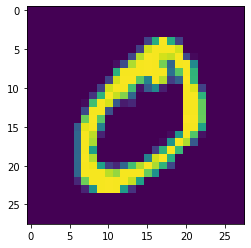

In [18]:
plt.imshow(X_train[1])

##Normalisation

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
model = Sequential()

## Train the model using LSTM

In [22]:
model.add(LSTM(128, input_shape =(28,28),activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_1 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 216,426
Trainable params: 216,426
Non-trainable params: 0
_________________________________________________________________


In [24]:
opt = tf.keras.optimizers.Adam(lr = 1e-3, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
model.compile(optimizer=opt, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 93s 49ms/step - loss: 0.4365 - accuracy: 0.8568 - val_loss: 0.1177 - val_accuracy: 0.9624
Epoch 2/2
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1136 - accuracy: 0.9658 - val_loss: 0.0728 - val_accuracy: 0.9769
